# Generators (Parallel-Coordinate Plots (PCP))

## Notebook for generating basic PCPs of the Pareto-optimal fronts with appropriate colorings and point-sizes.

This notebook can be used to generate basic PCPs of all the Pareto-optimal fronts with suitable colorings and point-sizes. This notebook tests the `plot()` fucntion from the `vis.plotting.pcp` module. All the Pareto-optimal data point files hard-coded in the dictionary pfs. Currently this notebook provides these Pareto-optimal fronts.

- DTLZ2 ($m$-Sphere) Problem
- DEBMDK (Knee) Problem
- CDEBMDK (Constrained Knee) Problem
- C0-DTLZ2 (A split $m$-sphere with a small isolated cluster at $f_m$-axis)
- C2-DTLZ2 Problem
- DTLZ8 Problem (A 3-dimensional line and an $m$-dimensional hypersurface)
- GAA Problem (A 10-objective and 18-constraint general aviation design problem)

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

### Generate and save plots.

In [2]:
sys.path.append('../')
from vis.plotting.utils import resize_by_tradeoff, color_by_dist, color_by_cv, enhance_color

def load_props(path):
    r"""
    Load CV, Mu, Ik and S from path.
    """
    CV = None
    cvpathf = os.path.join(path, "datacv.csv")
    if os.path.exists(cvpathf):
        CV = np.loadtxt(cvpathf)

    # load the Mu values
    Mu = None
    mupathf = os.path.join(path, "mu.csv")
    if os.path.exists(mupathf):
        Mu = np.loadtxt(mupathf)

    # load the knee indices
    Ik = None
    kpathf = os.path.join(path, "muid.csv")
    if os.path.exists(kpathf):
        Ik = np.loadtxt(kpathf, dtype=int)
        
    return CV, Mu, Ik

def decide_size_color(CV, Mu, Ik):
    r"""
    Decide point-size and color from `CV`, `Mu` and `Ik`
    """
    # decide point-size
    S = 1
    if Mu is not None and Ik is not None:
        S = resize_by_tradeoff(Mu, k=Ik)

    # decide colors
    # C = default_color(F.shape[0], alpha=0.5)
    M = np.mean(F, axis=0)
    C, D = color_by_dist(F, M, alpha=0.15)
    
    # if CV is available, use CV to color
    if CV is not None:
        C = color_by_cv(CV, alpha=0.15)

    # enhance knee points
    if Ik is not None:
        C = enhance_color(C, Ik, alpha=0.5)
    return S, C, D

### Do PCPs

../data/dtlz2/3d/dataf.csv (1000, 3) ['..', 'data', 'dtlz2', '3d'] dtlz2


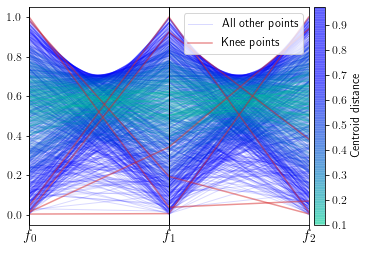

../data/dtlz2/4d/dataf.csv (2000, 4) ['..', 'data', 'dtlz2', '4d'] dtlz2


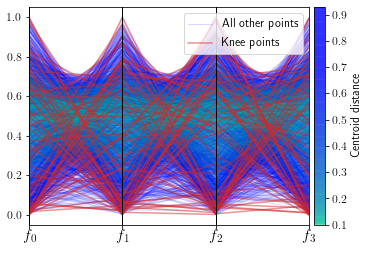

../data/dtlz2/8d/dataf.csv (4000, 8) ['..', 'data', 'dtlz2', '8d'] dtlz2


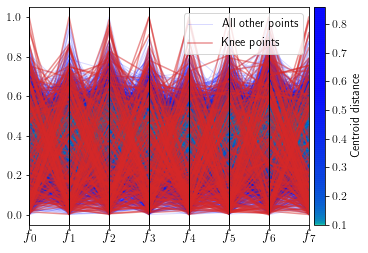

In [3]:
%matplotlib inline
sys.path.append('../')
from vis.plotting import pcp
from vis.utils import transform as tr

pfs = {'dtlz2': ['3d', '4d', '8d'], \
       'dtlz2-nbi': ['3d', '4d', '8d'], \
       'debmdk': ['3d', '4d', '8d'], \
       'debmdk-nbi': ['3d', '4d', '8d'], \
       'debmdk-all': ['3d', '4d', '8d'], \
       'debmdk-all-nbi': ['3d', '4d', '8d'], \
       'dtlz8': ['3d', '4d', '6d', '8d'], \
       'dtlz8-nbi': ['3d', '4d', '6d', '8d'], \
       'c2dtlz2': ['3d', '4d', '5d', '8d'], \
       'c2dtlz2-nbi': ['3d', '4d', '5d', '8d'], \
       'cdebmdk': ['3d', '4d', '8d'], \
       'cdebmdk-nbi': ['3d', '4d', '8d'], \
       'c0dtlz2': ['3d', '4d', '8d'], \
       'c0dtlz2-nbi': ['3d', '4d', '8d'], \
       'crash-nbi': ['3d'], 'crash-c1-nbi': ['3d'], 'crash-c2-nbi': ['3d'], \
       'gaa': ['10d'], \
       'gaa-nbi': ['10d']}

constrained_pfs = ['dtlz8', 'dtlz8-nbi', \
                   'c2dtlz2', 'c2dtlz2-nbi', \
                   'cdebmdk', 'cdebmdk-nbi', \
                   'c0dtlz2', 'c0dtlz2-nbi', \
                   'gaa', 'gaa-nbi']

for pf in list(pfs.keys())[0:1]:
    for dim in pfs[pf]:
        fullpathf = "../data/{0:s}/{1:s}/dataf.csv".format(pf, dim)
        if os.path.exists(fullpathf):
            path, filenamef = os.path.split(fullpathf)
            dirs = path.split('/')
            frontname = dirs[-2]

            # load the front
            F = np.loadtxt(fullpathf, delimiter=',')
            # we need to normalize in the case of pcp, otherwise the data will not be
            # visible in some cases.
            F = tr.normalize(F, lb = np.zeros(F.shape[1]), ub = np.ones(F.shape[1]))
            print(fullpathf, F.shape, dirs, frontname)
            
            # decide on colors and sizes
            CV, Mu, Ik = load_props(path)
            S,C,D = decide_size_color(CV, Mu, Ik)
            
            # all indices
            I = np.arange(0,F.shape[0],1).astype(int)
            # indices of non-knee points
            Ip = np.setdiff1d(I, Ik)
                        
            # non-knee points
            Fp = F[Ip,:]
            Cp = C[Ip,:]
            
            # xtick_labels
            Lt = np.array(["$f_{{{:d}}}$".format(v) for v in range(Fp.shape[1])])
            # line labels
            Llp = np.array(["All other points".format(v) for v in range(Ip.shape[0])])

            # knee colors
            Ck = C[Ik,:]
            # knee point line labels
            Llk = np.array(["Knee points".format(v) for v in range(Ik.shape[0])])

            # get distnace from centroid or cv values
            Dp = CV[Ip] if pf in constrained_pfs else D[Ip]
            # sort the points and their colors w.r.t. distance from centroid or cv, i.e. Dp
            Id = np.column_stack((Dp, Fp, Cp)).astype(object)
            Id = Id[np.argsort(Id[:, 0])]
                
            if pf in constrained_pfs:
                # points are sorted ascendingly w.r.t Dp and they will be plotted according 
                # to that order, therefore, we reverse them so that the points closer to the
                # constraint boundaries (pink points) will be plotted last.
                Fp = Id[:,1:Fp.shape[1]+1].astype(float)
                Cp = Id[:,Fp.shape[1]+1:].astype(float)
                # since we are not plotting in a reverse order, 
                # we don't need to flip the color bar
                cbar_flip = False     
                cbar_label = "Cumulative normalized CV"
            else:
                # points are sorted ascendingly w.r.t Dp and they will be plotted according 
                # to that order, therefore, we reverse them so that the points closer to the
                # centroid (light-green points) will be plotted last.
                Fp = Id[:,1:Fp.shape[1]+1].astype(float)[::-1]
                Cp = Id[:,Fp.shape[1]+1:].astype(float)[::-1]
                # since we are plotting in a reverse order, 
                # we need to flip the color bar
                cbar_flip = True
                cbar_label = "Centroid distance"
            
            # the colorbar gradient will be according to Dp
            Cgp = Dp

            figpath = os.path.join(path, "pcp.pdf")
            with plt.rc_context({"text.usetex": True, "font.size": 12}):
                ax = plt.figure().gca()

                # plot non-knee points
                pcp.plot(Fp, ax=ax, c=Cp, lw=1.00, xtick_labels=Lt, line_labels=Llp, show_colorbar=True, \
                         cbar_grad=Cgp, cbar_label=cbar_label, cbar_flip=cbar_flip)
                # plot knee points
                pcp.plot(F[Ik,:], ax=ax, c=Ck, lw=1.50, line_labels=Llk)

                # save the fig
                plt.savefig(figpath, bbox_inches='tight', dpi=150, pad_inches=0)
                # show
                plt.show()